# Fake training data from MNIST

We need lots of data to feed into object detection models. Here I generate this data using mnist dataset.

In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '4')

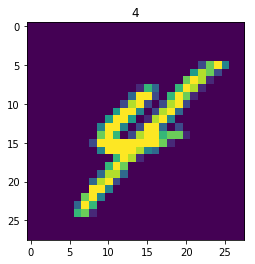

In [3]:
randcase = np.random.randint(0,2000)
plt.imshow(x_train[randcase,:,:])
plt.title(y_train[randcase])

Text(0.5, 1.0, '4')

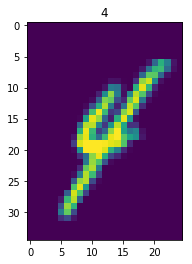

In [4]:
plt.imshow( cv2.resize(x_train[randcase,:,:],(25,35) ))
plt.title(y_train[randcase])

In [5]:
np.max(x_train[randcase,:,:]), np.min(x_train[randcase,:,:])

(255, 0)

# Make training data:

Digits are 28x28 pixels. Since YOLO cannot handle many small images, the training data will allocate only 10 rows of numbers and 10 columns; i.e. sides will be (28+8)*10 = 360 pixels.


In [6]:
# Make 1000 training cases
width = 360
height= 360


In [7]:
training = np.zeros((1000,width,height))
trainingy = []

In [8]:
# In real life, numbers may overlap by a few pixels, so let's make a grid of boxes with side size of 20 (instead of 28)
# Also, 10px of padding
cellsize = 20
ncases = 1000
txcases = x_train.shape[0]
rows = int((height-cellsize)/cellsize)
cols = int((width-cellsize)/cellsize)
offsetx = np.random.randint(0,10)
offsety = np.random.randint(0,10)

In [9]:
# Should we add some noise?
# training[0,:,:] += np.random.choice([0,0,0,0,0,10,20,100], (360,360))

In [10]:
for i in range(0, ncases):
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,7)==2):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(25,32)
                reheight = np.random.randint(24,30)
                x = (offsetx + col*cellsize)
                y = (offsety + row*cellsize)
                training[i, y: y + reheight, x: x + rewidth] = \
                    np.max([training[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                trainingy.append([i, x,y,rewidth,reheight, y_train[randcase] ])

In [11]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

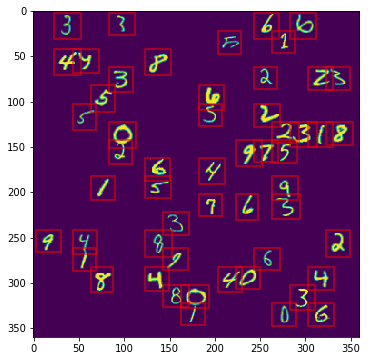

In [12]:
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(training[0])
rects = [ Rectangle((x[1], x[2]), x[3], x[4]) for x in trainingy if x[0] == 0 ]
ax = plt.gca()
pc = PatchCollection(rects, facecolor="None", alpha=0.5, linewidth=2,
                     edgecolor="red")
ax.add_collection(pc)

In [13]:
np.save("training_x.npy",  training)

In [14]:
! gzip training_x.npy -f

In [15]:
np.save("training_y.npy", trainingy)

In [16]:
! gzip training_y.npy -f

In [17]:
!mkdir output_data

mkdir: cannot create directory ‘output_data’: File exists


In [19]:
for i in range(0, ncases):
    cv2.imwrite("output_data/"+str(i)+".jpg", (255-training[i]) )

In [29]:
with open("output_data/data.txt", "w") as outputfile:
    for y in trainingy:
        outputfile.write("output_data/" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/data.names", "w") as outputfile:
    for i in range(0,10):
        outputfile.write(str(i) + "\n")

In [22]:
# Test cases
ncases = 250

In [24]:
tests = np.zeros((ncases,width,height))
testsy = []

In [25]:
for i in range(0, ncases):
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,7)==2):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(25,32)
                reheight = np.random.randint(24,30)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                tests[i, y: y + reheight, x: x + rewidth] = \
                    np.max([tests[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                testsy.append([i, x,y,rewidth,reheight, y_train[randcase] ])

In [26]:
np.save("tests_x.npy",  tests)
np.save("tests_y.npy",  testsy)

In [30]:
for i in range(0, ncases):
    cv2.imwrite("output_data/test-"+str(i)+".jpg", (255-tests[i]) )

In [28]:
with open("output_data/tests.txt", "w") as outputfile:
    for y in testsy:
        outputfile.write("output_data/test-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/tests.names", "w") as outputfile:
    for i in range(0,10):
        outputfile.write(str(i) + "\n")

# Generating data with noise

In [48]:
# Load noisy backgrounds:
bgs = [cv2.imread("output_data/fondo-con-ruido-1.jpg"),
       cv2.imread("output_data/fondo-con-ruido-2.jpg"),
       cv2.imread("output_data/fondo-con-ruido-3.jpg")
      ]
bgs.append(bgs[1]+bgs[2])
bgs.append(bgs[0]+bgs[2])
bgs.append(bgs[0]+bgs[1])

In [49]:
for i in range(0, len(bgs)):
    bgs[i] = cv2.resize(bgs[i], (416, 416))

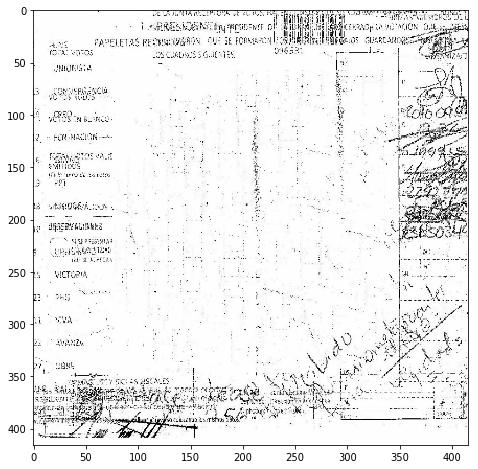

In [198]:
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(bgs[5])

In [252]:
# Make 1000 training cases
width = 416
height= 416
ncases = 500

In [253]:
cellsize = 22
txcases = x_train.shape[0]
height2 = 200
width2 = 250
rows = int((height2 - cellsize)/cellsize)
cols = int((width2 - cellsize)/cellsize)
offsetx = 100 + np.random.randint(0,10)
offsety = 100 + np.random.randint(0,10)

In [254]:
training2 = np.zeros((ncases,width,height))

In [264]:
training2[:,:,:] = 0
training2y = []

In [265]:
for i in range(0, ncases):
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,5)==2):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(15,32)
                reheight = np.random.randint(15,32)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                training2[i, y: y + reheight, x: x + rewidth] = \
                    np.max([training2[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                training2y.append([i, x,y,rewidth,reheight, y_train[randcase] ])
                
    training2[i,:,:] = 255 - np.min([255-training2[i], np.sum( bgs[np.random.randint(0,len(bgs))], axis=(2)) ], axis = 0 )

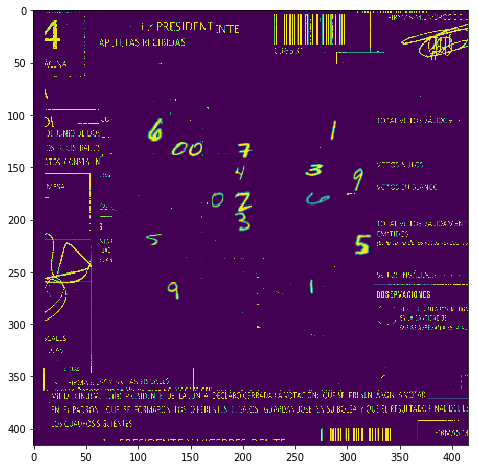

In [266]:
plt.imshow( training2[0] )

In [267]:
np.save("train2_x.npy",  training2)
np.save("train2_y.npy",  training2y)

In [268]:
for i in range(0, ncases):
    cv2.imwrite("output_data/train2-"+str(i)+".jpg", 255 - training2[i])

In [269]:
with open("output_data/train2.txt", "w") as outputfile:
    for y in training2y:
        outputfile.write("output_data/train2-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/train2.names", "w") as outputfile:
    for i in range(0,10):
        outputfile.write(str(i) + "\n")

In [270]:
! cat output_data/data.txt output_data/train2.txt > output_data/data2.txt